In [1]:
import scipy
import numpy as np
from math import sqrt
from scipy import stats
from numpy import cov, linspace
from statistics import mean
from numpy.random import normal, exponential
import matplotlib.pyplot as plt
from random import random
%matplotlib inline

In [2]:
%%html
<style>
.output_wrapper .output {
  overflow-y: visible;
  height: fit-content;
}
</style>

In [3]:
def lift(A, B):
    return mean(B) - mean(A)

def p_value(A, B):
    return stats.ttest_ind(A, B)[1]

Simulating 1000 A/B tests, true treatment lift is 2...
N samples  A/B testing, mean lift = 2.01, variance of lift = 0.19
4N samples A/B testing, mean lift = 2.00, variance of lift = 0.05
Raio of lift variance = 0.25 (expected = 0.25)


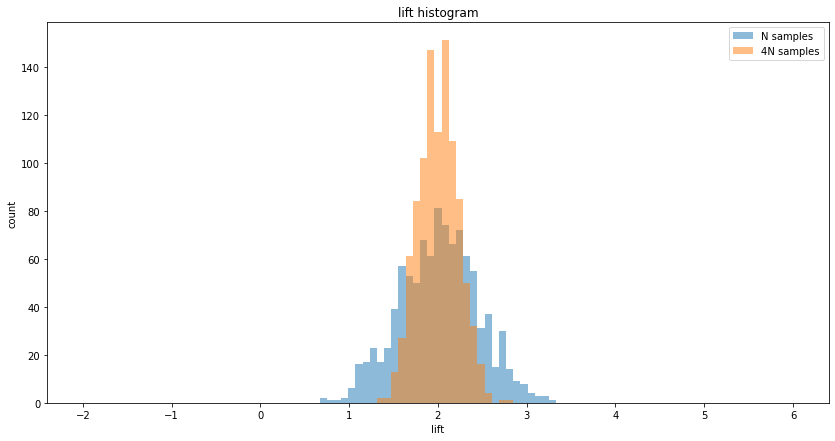

In [4]:
def get_AB_samples(mu, sigma, treatment_lift, N):
    A = list(normal(loc=mu                 , scale=sigma, size=N))
    B = list(normal(loc=mu + treatment_lift, scale=sigma, size=N))
    return A, B

N = 1000
N_multiplier = 4
mu = 100
sigma = 10
treatment_lift = 2
num_simulations = 1000

print('Simulating %s A/B tests, true treatment lift is %d...' % (num_simulations, treatment_lift))

n1_lifts, n4_lifts = [], []
for i in range(num_simulations):
    print('%d/%d' % (i, num_simulations), end='\r')
    A, B = get_AB_samples(mu, sigma, treatment_lift, N)
    n1_lifts.append(lift(A, B))
    A, B = get_AB_samples(mu, sigma, treatment_lift, N_multiplier*N)
    n4_lifts.append(lift(A, B))
    
print('N samples  A/B testing, mean lift = %.2f, variance of lift = %.2f' % (mean(n1_lifts), cov(n1_lifts)))
print('4N samples A/B testing, mean lift = %.2f, variance of lift = %.2f' % (mean(n4_lifts), cov(n4_lifts)))
print('Raio of lift variance = %.2f (expected = %.2f)' % (cov(n4_lifts)/cov(n1_lifts), 1/N_multiplier))

bins = linspace(-2, 6, 100)
plt.figure(figsize=(14, 7))
plt.hist(n1_lifts, bins, alpha=0.5, label='N samples')
plt.hist(n4_lifts, bins, alpha=0.5, label=f'{N_multiplier}N samples')
plt.xlabel('lift')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.title('lift histogram')
plt.show()

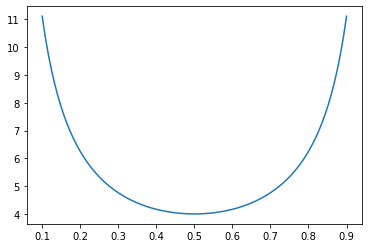

In [5]:
x = np.linspace(0.1, 0.9, 100)
y = 1/x + 1/(1-x)
plt.plot(x,y)
plt.show()

Simulating 1000 A/B tests, true treatment lift is 2...
Even split   A/B testing, mean lift = 1.99, variance of lift = 0.09
Uneven split A/B testing, mean lift = 1.99, variance of lift = 0.27
Raio of lift variance = 0.34 (expected = 0.36)


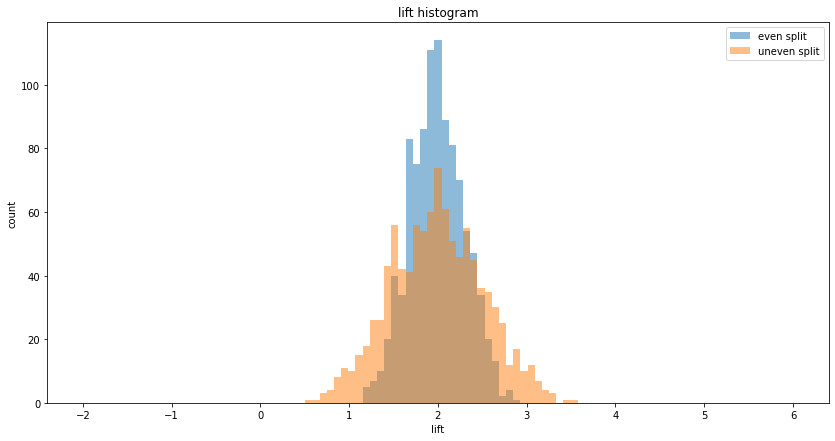

In [6]:
def get_AB_samples(mu, sigma, treatment_lift, N_A, N_B):
    A = list(normal(loc=mu                 , scale=sigma, size=N_A))
    B = list(normal(loc=mu + treatment_lift, scale=sigma, size=N_B))
    return A, B

def expected_ratio(p, q):
    top = 1/p + 1/(1-p)
    bot = 1/q + 1/(1-q)
    return top/bot

N = 4000
mu = 100
sigma = 10
treatment_lift = 2
even_ratio = 0.5
uneven_ratio = 0.9
num_simulations = 1000

print('Simulating %s A/B tests, true treatment lift is %d...' % (num_simulations, treatment_lift))

even_lifts, uneven_lifts = [], []
for i in range(num_simulations):
    print('%d/%d' % (i, num_simulations), end='\r')
    A, B = get_AB_samples(mu, sigma, treatment_lift, int(N*even_ratio), int(N*(1-even_ratio)))
    even_lifts.append(lift(A, B))
    A, B = get_AB_samples(mu, sigma, treatment_lift, int(N*uneven_ratio), int(N*(1-uneven_ratio)))
    uneven_lifts.append(lift(A, B))
    
print('Even split   A/B testing, mean lift = %.2f, variance of lift = %.2f' % (mean(even_lifts),   cov(even_lifts)))
print('Uneven split A/B testing, mean lift = %.2f, variance of lift = %.2f' % (mean(uneven_lifts), cov(uneven_lifts)))
print('Raio of lift variance = %.2f (expected = %.2f)' % ((cov(even_lifts)/cov(uneven_lifts)), expected_ratio(even_ratio, uneven_ratio)))

bins = linspace(-2, 6, 100)
plt.figure(figsize=(14, 7))
plt.hist(even_lifts, bins, alpha=0.5, label='even split')
plt.hist(uneven_lifts,    bins, alpha=0.5, label='uneven split')
plt.xlabel('lift')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.title('lift histogram')
plt.show()

Simulating 1000 A/B tests, true treatment lift is 2...


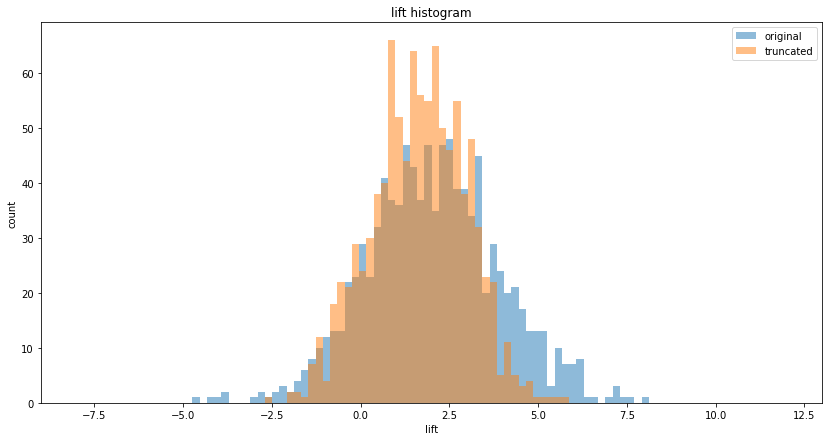

In [7]:
def get_AB_samples(scale, treatment_lift, N):
    A = list(exponential(scale=scale                 , size=N))
    B = list(exponential(scale=scale + treatment_lift, size=N))
    # add outliers
    for i in range(int(N*0.001)):
        A.append(random()*scale*100)
        B.append(random()*scale*100 + treatment_lift)
    return A, B

N = 10*1000
scale = 100
treatment_lift = 2
num_simulations = 1000

print('Simulating %s A/B tests, true treatment lift is %d...' % (num_simulations, treatment_lift))

orig_lifts, trunc_lifts = [], []
for i in range(num_simulations):
    print('%d/%d' % (i, num_simulations), end='\r')
    A, B = get_AB_samples(scale, treatment_lift, N)
    orig_lifts.append(lift(A, B))
    A, B = [x for x in A if x < 5*scale], [x for x in B if x < 5*scale]
    trunc_lifts.append(lift(A, B))

bins = linspace(-8, 12, 99)
plt.figure(figsize=(14, 7))
plt.hist(orig_lifts, bins, alpha=0.5, label='original')
plt.hist(trunc_lifts, bins, alpha=0.5, label='truncated')
plt.xlabel('lift')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.title('lift histogram')
plt.show()

Simulating 1000 A/B tests, true treatment lift is 2...


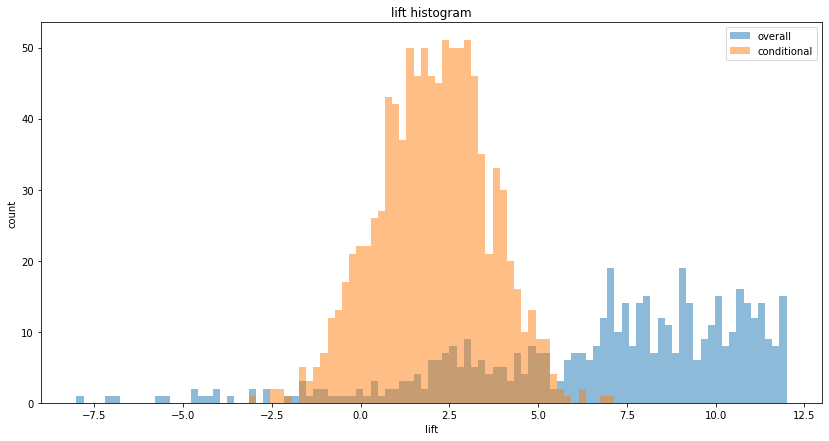

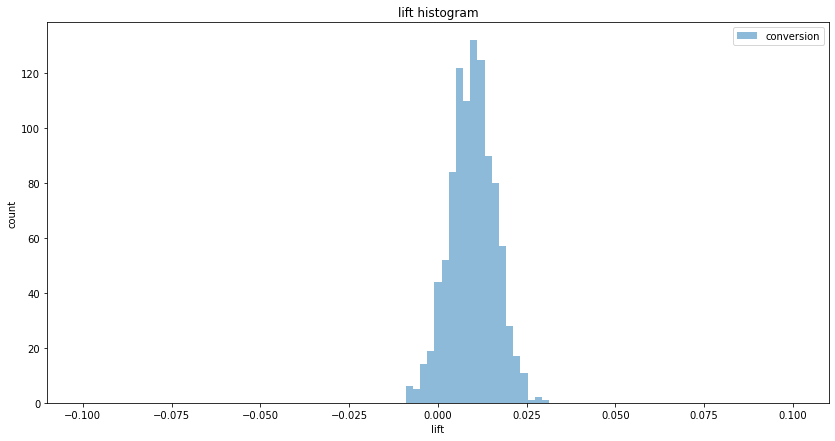

In [8]:
def get_AB_samples(p, p_lift, mu, sigma, treatment_lift, N_A, N_B):
    A = list(normal(loc=mu                 , scale=sigma, size=N_A))
    B = list(normal(loc=mu + treatment_lift, scale=sigma, size=N_B))
    A = [x if random() < p        else 0 for x in A]
    B = [x if random() < p+p_lift else 0 for x in B]
    return A, B

N = 10*1000
p = 0.1
p_lift = 0.01
mu = 100
sigma = 25
treatment_lift = 2
num_simulations = 1000

print('Simulating %s A/B tests, true treatment lift is %d...' % (num_simulations, treatment_lift))

cont_lifts, cond_lifts, conv_lifts = [], [], []
for i in range(num_simulations):
    print('%d/%d' % (i, num_simulations), end='\r')
    A, B = get_AB_samples(p, p_lift, mu, sigma, treatment_lift, int(N/2), int(N/2))
    cont_lifts.append(lift(A, B)/p)
    A_, B_ = [x for x in A if x > 0], [x for x in B if x > 0]
    cond_lifts.append(lift(A_, B_))
    A_, B_ = [1 if x > 0 else 0 for x in A], [1 if x > 0 else 0 for x in B]
    conv_lifts.append(lift(A_, B_))

bins = linspace(-8, 12, 100)
plt.figure(figsize=(14, 7))
plt.hist(cont_lifts, bins, alpha=0.5, label='overall')
plt.hist(cond_lifts, bins, alpha=0.5, label='conditional')
plt.xlabel('lift')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.title('lift histogram')
plt.show()

bins = linspace(-0.1, 0.1, 100)
plt.figure(figsize=(14, 7))
plt.hist(conv_lifts, bins, alpha=0.5, label='conversion')
plt.xlabel('lift')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.title('lift histogram')
plt.show()

Simulating 1000 A/B tests, true treatment lift is 2...
Stratified sampling   A/B testing, mean lift = 2.00, variance of lift = 0.05
Random sampling       A/B testing, mean lift = 1.94, variance of lift = 1.35
Raio of lift variance = 0.04


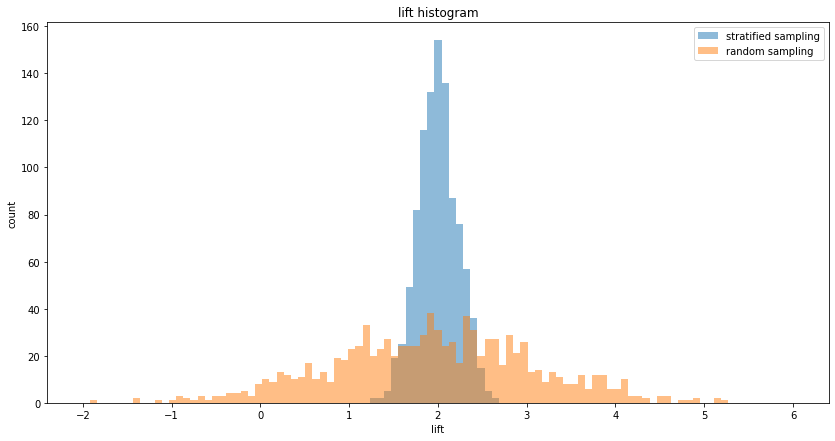

In [9]:
def get_AB_samples_str(
    pop1_mu, pop1_sigma,
    pop2_mu, pop2_sigma,
    pop1_ratio,
    treatment_lift,
    N,
):
    A =  list(normal(loc=pop1_mu, scale=pop1_sigma, size=int(N*pop1_ratio)))
    A += list(normal(loc=pop2_mu, scale=pop2_sigma, size=int(N*(1-pop1_ratio))))
    B =  list(normal(loc=pop1_mu + treatment_lift, scale=pop1_sigma, size=int(N*pop1_ratio)))
    B += list(normal(loc=pop2_mu + treatment_lift, scale=pop2_sigma, size=int(N*(1-pop1_ratio))))
    return A, B
#     A = []
#     for i in range(N):
#         if i < int(pop1_ratio*N):
#             A.append(normal(loc=pop1_mu, scale=pop1_sigma))
#         else:
#             A.append(normal(loc=pop2_mu, scale=pop2_sigma))
#     B = []
#     for i in range(N):
#         if i < int(pop1_ratio*N):
#             B.append(normal(loc=pop1_mu + treatment_lift, scale=pop1_sigma))
#         else:
#             B.append(normal(loc=pop2_mu + treatment_lift, scale=pop2_sigma))
#     return A, B

def get_AB_samples_rnd(
    pop1_mu, pop1_sigma,
    pop2_mu, pop2_sigma,
    pop1_ratio,
    treatment_lift,
    N,
):
    A = []
    for _ in range(N):
        if random() < pop1_ratio:
            A.append(normal(loc=pop1_mu, scale=pop1_sigma))
        else:
            A.append(normal(loc=pop2_mu, scale=pop2_sigma))
    B = []
    for _ in range(N):
        if random() < pop1_ratio:
            B.append(normal(loc=pop1_mu + treatment_lift, scale=pop1_sigma))
        else:
            B.append(normal(loc=pop2_mu + treatment_lift, scale=pop2_sigma))
    return A, B


N = 4000
pop1_ratio = 0.5
pop1_mu = 100
pop2_mu = 200
pop1_sigma = pop2_sigma = 10
treatment_lift = 2
num_simulations = 1000

print('Simulating %s A/B tests, true treatment lift is %d...' % (num_simulations, treatment_lift))

str_lifts, rnd_lifts = [], []
for i in range(num_simulations):
    print('%d/%d' % (i, num_simulations), end='\r')
    A, B = get_AB_samples_str(pop1_mu, pop1_sigma, pop2_mu, pop2_sigma, pop1_ratio, treatment_lift, N)
    str_lifts.append(lift(A, B))
    A, B = get_AB_samples_rnd(pop1_mu, pop1_sigma, pop2_mu, pop2_sigma, pop1_ratio, treatment_lift, N)
    rnd_lifts.append(lift(A, B))
    
print('Stratified sampling   A/B testing, mean lift = %.2f, variance of lift = %.2f' % (mean(str_lifts), cov(str_lifts)))
print('Random sampling       A/B testing, mean lift = %.2f, variance of lift = %.2f' % (mean(rnd_lifts), cov(rnd_lifts)))
print('Raio of lift variance = %.2f' % (cov(str_lifts)/cov(rnd_lifts)))

bins = linspace(-2, 6, 100)
plt.figure(figsize=(14, 7))
plt.hist(str_lifts, bins, alpha=0.5, label='stratified sampling')
plt.hist(rnd_lifts, bins, alpha=0.5, label='random sampling')
plt.xlabel('lift')
plt.ylabel('count')
plt.legend(loc='upper right')
plt.title('lift histogram')
plt.show()